In [13]:
from matplotlib import pyplot as plt

import numpy as np
import cv2 as cv

In [14]:
initX = [37, 342, 485, 73]
initY = [51, 42, 467, 380]

finalX = [0, 511, 511, 0]
finalY = [0, 0, 511, 511]


In [15]:
img = cv.imread('./images/baboon_perspectiva.png', cv.IMREAD_GRAYSCALE)


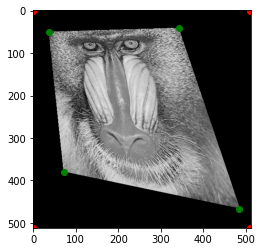

In [16]:
plt.imshow(img, cmap='gray')
plt.plot(initX, initY)
plt.plot(finalX, finalY)

plt.show()
